# Handwritten digits using One vs All regularized logistic regression

<Figure size 720x720 with 0 Axes>

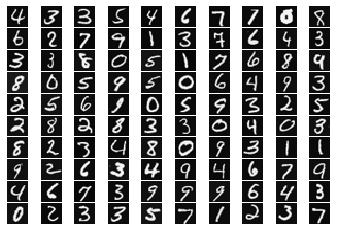

In [2]:
# Exercise to classify handwriten digits using One vs All logistic Regression
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.optimize import minimize

data = sio.loadmat('data1ex3')
X = data['X']
y = data['y']

plt.figure(figsize=(10, 10))
fig = plt.figure()
fig.subplots_adjust(hspace=0.05, wspace=0.025)
for i in range(1, 101):
    randPlot = np.random.randint(1, 5000)
    ax = fig.add_subplot(10, 10, i)
    plt.imshow(X[randPlot,:].reshape(20,20).T, cmap='gray', extent=[0, 1, 0, 1])
    ax.axis('off')

Implementing the regularized cost function for logistic regression

The hypothesis of logistic regression is
$$h_\theta = g(\theta^Tx) $$
where $g$ is the sigmoid function defined below
$$g(z) = \frac{1}{1+e^{-z}}$$

The cost function in compact form is given by
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1- h_\theta(x^{(i)})) ] + \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_j^2 $$

In the vectorized form the cost function becomes:

$$h = g(\theta^Tx) $$

$$J(\theta) = \frac{1}{m} [-y^Tlog(h) - (1 - y)^Tlog(1- h)] + \frac{\lambda}{2m} \theta^T\theta  $$




The regularized gradient for the objective function is 
$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \quad \text{for} j=0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = (\frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j \quad \text{for } j \geq 1 $$.


or in vector form

$$ \nabla J(\theta) = \frac{1}{m}X^T(h-y) + \frac{\lambda}{m}\circ\theta_j $$ 

being lambda a vector

$$\lambda_0 = 0 \quad\text{and}\quad \lambda_i = \lambda \quad \text{for} \quad i \in{1,...,m} $$


In [45]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Implementing Cost Function and Gradient to be used with scipy.optimize
def LogisticCostFunction(theta,Y,X,lambd):
    #  Regularized Cost function for logistic Regression (see Reg)
    m = Y.size
    h = sigmoid(X @ theta)
    J = -(1/m)*(Y.T@np.log(h) + (1-Y).T@np.log(1-h)) + (lambd/(2*m))*theta[1:].T@theta[1:]
    return J

def LogisticRegrGradient(theta,Y,X,lambd):
    # Regularized Logistic Regression Gradient
    m = Y.size
    h = sigmoid(X @ theta)
    lambdVec = lambd*np.ones(X.shape[1])
    lambdVec[0] = 0
    G = (1/m)*(X.T@(h-Y))+(lambd/m)*theta
    return G.flatten()

def PredictOnevsALL(theta,X):
    # Create a function to predict values.
    h = sigmoid(X @ theta)
    prob = np.nanmax(h,axis=1)
    pred = np.argmax(h, axis=1)+1
    return prob,pred


In [105]:
# Training the classifier
X = np.insert(X, 0, 1, axis=1)
numClasses = 10
m,n = X.shape
AllTheta = np.zeros((n,numClasses))
lambd = 0.1
for cl in range(1,numClasses+1):
    yMask = (y==cl)
    Y = yMask.astype(int).flatten()
    theta = 0*np.ones((n))
    res = minimize(LogisticCostFunction, theta, args=(Y,X,lambd), method='CG', jac=LogisticRegrGradient,options={'disp': False,'maxiter':400})
    AllTheta[:,[cl-1]] = np.reshape(res.x, (-1, 1))

In [106]:
Prob, Pred = PredictOnevsALL(AllTheta,X)
print(Prob, Pred)

accuracy = np.mean(np.equal(y.flatten(),Pred))
print('Accuracy:',accuracy*100,'%')

[0.99973119 0.99997693 0.99997274 ... 0.88375209 0.85873185 0.23940592] [10 10 10 ...  9  9  7]
Accuracy: 96.48 %
